# Instacart Basket Analysis 

##### This script contains the following points :

### 1. Persoanlly identifible information PII.

### 2. Geographic segmentation.

### 3. Low Activity customer.

### 4. Customer profiling.

### 5. Distribution of customer profile.

### 6. Statistics on Customer Profile level for Order Frequency and expenditure.

### 7. Customer analysis by region 

### 8. Visualizations 

In [1]:
 #Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path=path=(r"C:\Users\hardjan\Instacart Basket Analysis March 2024")
ords_prods_merge=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_derived(4.9(1)).pkl'))

In [3]:
# Import product department index
department_index = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','departments_wrangled.csv'), index_col = False)

## 1. Personally identifiable Information PII

## 2. Geographic Segmentation 

### 2.1 define regions 


##### West 

In [4]:
# Define West states
west_states = ['Idaho','Montana','Wyoming','Nevada','Utah','Colorado','Arizona','New Mexico','Alaska','Washington','Oregon','California','Hawaii']

In [5]:
# Assign region
ords_prods_merge.loc[ords_prods_merge['State'].isin(west_states), 'region'] = 'West'

##### Midwest

In [6]:
# Define Midwest states
mid_west_states = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [7]:
# Assign Region 
ords_prods_merge.loc[ords_prods_merge['State'].isin(mid_west_states),'region']='Midwest'

##### South 

In [8]:
# define South states .
south_states = ['Delaware','Maryland','District of Columbia','Virginia','West Virginia','North Carolina','South Carolina','Georgia','Florida','Kentucky','Tennessee','Mississippi','Alabama','Oklahoma','Texas','Arkansas','Louisiana']

In [9]:
#define region 
ords_prods_merge.loc[ords_prods_merge['State'].isin(south_states),'region']='South'

##### Northeast

In [10]:
# Define Northeast states
northeast_states = ['Maine','New Hampshire','Vermont','Massachusetts','Rhode Island','Connecticut','New York','Pennsylvania','New Jersey']

In [11]:
# Assign region
ords_prods_merge.loc[ords_prods_merge['State'].isin(northeast_states),'region']='Northeast'

In [12]:
# User count by region
ords_prods_merge['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

### 2.2 Spending habits by region 

In [13]:
# Pivot spending_flag base on region
spend_by_region = pd.crosstab(ords_prods_merge['region'],ords_prods_merge['spending_flag'], dropna = False).sort_values(by = 'High spender', ascending = False)

In [14]:
spend_by_region

spending_flag,High spender,Low spender
region,,
South,209691,10582194
West,160354,8132559
Midwest,155975,7441350
Northeast,108225,5614511


In [15]:
ords_prods_merge.loc[ords_prods_merge['prices']>15,'price_range_loc']='High_range product'

In [16]:
ords_prods_merge.loc[(ords_prods_merge['prices']<=15)& (ords_prods_merge['prices']>5),'price_range_loc']='Mid_range product'

In [17]:
ords_prods_merge.loc[ords_prods_merge['prices']<=5,'price_range_loc']='Low_range product'

In [18]:
ords_prods_merge['price_range_loc'].value_counts()

price_range_loc
Mid_range product     21860860
Low_range product     10126321
High_range product      417678
Name: count, dtype: int64

In [19]:
# Pivot product price range base on region
price_region = pd.crosstab(ords_prods_merge['region'],ords_prods_merge['price_range_loc'], dropna = False).sort_values(by = 'High_range product', ascending = False)

In [20]:
price_region

price_range_loc,High_range product,Low_range product,Mid_range product
region,,,
South,139390,3368338,7284157
West,107168,2592736,5593009
Midwest,97918,2372304,5127103
Northeast,73202,1792943,3856591


### 3. Low Activity customer 

In [21]:
# Define low_activity customers
ords_prods_merge.loc[ords_prods_merge['order_sequence_number'] < 5, 'customer_activity'] = 'low_activity customers'

# Define high_activity customers
ords_prods_merge.loc[ords_prods_merge['order_sequence_number'] >= 5, 'customer_activity'] = 'high_activity customer'

In [22]:
# User count base on activity
ords_prods_merge['customer_activity'].value_counts(dropna= False)

customer_activity
high_activity customer    24414877
low_activity customers     7989982
Name: count, dtype: int64

### 4. Customer Profiling 

Age column is delineated into three categories for analytical purposes: 'young adult' (ages 18-40), 'middle age' (ages 40-60), and 'senior' (ages 60-81).

 Similarly, income column is stratified into four distinct tiers base on statistic percentile of the data: 'low income' (ranging from 25093 to 67124), 'lower middle class' (from 67124 to 96663), 'upper middle class' (from 96663 to 127961), and 'upper class' (from 127961 to 593901).

Two dimentions are combined together to define customer profile. Total 12 groups users are categorized in the customer profile.

### Define age, income groups 

In [23]:
# Define low-income young adult group
ords_prods_merge.loc[(ords_prods_merge['Age'] >= 18) & (ords_prods_merge['Age'] <= 40) 
         & (ords_prods_merge['income'] >= 25903) & (ords_prods_merge['income'] <= 67124),
      
         'customer_profile'] = 'low-income yound adult'



In [24]:
# Define low-income mid age group
ords_prods_merge.loc[(ords_prods_merge['Age'] > 40) & (ords_prods_merge['Age'] <= 60) 
         & (ords_prods_merge['income'] >= 25903) & (ords_prods_merge['income'] <= 67124),
      
         'customer_profile'] = 'low-income mid age'

In [25]:
# Define low-income senior group
ords_prods_merge.loc[(ords_prods_merge['Age'] > 60) &  (ords_prods_merge['Age'] <= 81  )
         & (ords_prods_merge['income'] >= 25903) & (ords_prods_merge['income'] <= 67124),
      
         'customer_profile'] = 'low-ncome senior'

In [26]:
# Define lower-middle-class young adult group
ords_prods_merge.loc[(ords_prods_merge['Age'] >= 18) & (ords_prods_merge['Age'] <= 40) 
         & (ords_prods_merge['income'] > 67124) & (ords_prods_merge['income'] <= 96663),
      
         'customer_profile'] = 'lower-middle-class yound adult'

In [27]:
# Define lower-middle-class mid age group
ords_prods_merge.loc[(ords_prods_merge['Age'] > 40) & (ords_prods_merge['Age'] <= 60) 
         & (ords_prods_merge['income'] > 67124 ) & (ords_prods_merge['income'] <= 96663 ),
      
         'customer_profile'] = 'lower-middle-class mid age'

In [28]:
# Define lower-middle-class senior group
ords_prods_merge.loc[(ords_prods_merge['Age'] > 60) &  (ords_prods_merge['Age'] <= 81  )
         & (ords_prods_merge['income'] > 67124 ) & (ords_prods_merge['income'] <= 96663 ),
      
         'customer_profile'] = 'lower-middle-class senior'

In [29]:
# Define upper-middle-class young adult group
ords_prods_merge.loc[(ords_prods_merge['Age'] >= 18) & (ords_prods_merge['Age'] <= 40) 
         & (ords_prods_merge['income'] > 96663 ) & (ords_prods_merge['income'] <= 127961 ),
      
         'customer_profile'] = 'upper-middle-class yound adult'

In [30]:
# Define upper-middle-class mid age group
ords_prods_merge.loc[(ords_prods_merge['Age'] > 40) & (ords_prods_merge['Age'] <= 60) 
         & (ords_prods_merge['income'] > 96663 ) & (ords_prods_merge['income'] <= 127961 ),
        'customer_profile'] = 'upper-middle-class mid age'

In [31]:
# Define upper-middle-class senior group
ords_prods_merge.loc[(ords_prods_merge['Age'] > 60) &  (ords_prods_merge['Age'] <= 81  )
         & (ords_prods_merge['income'] > 96663 ) & (ords_prods_merge['income'] <= 127961 ),
      
         'customer_profile'] = 'upper-middle-class senior'

In [32]:
# Define upper-class young adult group
ords_prods_merge.loc[(ords_prods_merge['Age'] >= 18) & (ords_prods_merge['Age'] <= 40) 
         & (ords_prods_merge['income'] > 127961 ) & (ords_prods_merge['income'] <= 593901 ),
      
         'customer_profile'] = 'upper-class young adult'

In [33]:
# Define upper-class mid age group
ords_prods_merge.loc[(ords_prods_merge['Age'] > 40) & (ords_prods_merge['Age'] <= 60) 
         & (ords_prods_merge['income'] > 127961 ) & (ords_prods_merge['income'] <= 593901 ),
      
         'customer_profile'] = 'upper-class mid age'

In [34]:
# Define upper-class senior group
ords_prods_merge.loc[(ords_prods_merge['Age'] > 60) &  (ords_prods_merge['Age'] <= 81  )
         & (ords_prods_merge['income'] > 127961 ) & (ords_prods_merge['income'] <= 593901 ),
      
         'customer_profile'] = 'upper-class senior'

###  4.2 Family status and dependants number with profile

In [35]:
# Familiy status count by customer profile
pro_fam = pd.crosstab(ords_prods_merge['customer_profile'], ords_prods_merge['family_status'], dropna = False)
pro_fam

family_status,divorced/widowed,living with parents and siblings,married,single
customer_profile,,,,
low-income mid age,14349,0,1020256,321321
low-income yound adult,0,696494,3345273,1356122
low-ncome senior,339389,0,1041818,0
lower-middle-class mid age,14297,0,985543,305749
lower-middle-class senior,360408,0,1060122,0
lower-middle-class yound adult,0,734902,3303209,1321822
upper-class mid age,46190,0,2908235,943269
upper-class senior,1011226,0,3048553,0
upper-class young adult,0,17948,85311,30121


In [36]:
# Number of dependants by customer profile
cust_dependants = pd.crosstab(ords_prods_merge['customer_profile'], ords_prods_merge['dependants'], dropna = False)
cust_dependants

dependants,0,1,2,3
customer_profile,,,,
low-income mid age,335670,341242,327394,351620
low-income yound adult,1356122,1338227,1351706,1351834
low-ncome senior,339389,349379,350832,341607
lower-middle-class mid age,320046,337078,314914,333551
lower-middle-class senior,360408,342430,372231,345461
lower-middle-class yound adult,1321822,1353422,1338505,1346184
upper-class mid age,989459,979412,945180,983643
upper-class senior,1011226,991559,1038437,1018557
upper-class young adult,30121,33277,36246,33736


### Distribution of Customer Profile 

In [37]:
# Distribution of customer profile
ords_prods_merge['customer_profile'].value_counts()

customer_profile
low-income yound adult            5397889
lower-middle-class yound adult    5359933
upper-class senior                4059779
upper-class mid age               3897694
upper-middle-class senior         3721323
upper-middle-class mid age        3592765
lower-middle-class senior         1420530
low-ncome senior                  1381207
low-income mid age                1355926
lower-middle-class mid age        1305589
upper-middle-class yound adult     778844
upper-class young adult            133380
Name: count, dtype: int64

Text(0.5, 0, 'User Count')

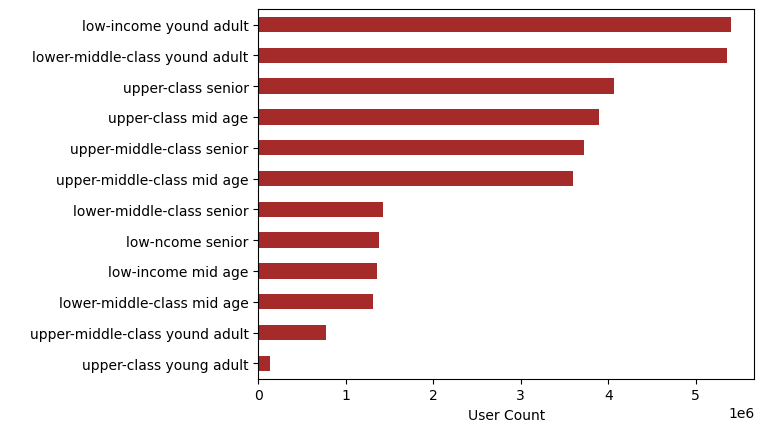

In [38]:
# Visualize the distribution of customer profile
ords_prods_merge['customer_profile'].value_counts(dropna= False).sort_values(ascending= True).plot.barh(color='brown')
plt.ylabel(' ') # Eliminate y lable
plt.xlabel('User Count')

### 6. Statistics on customer-profile for order frequency and expenditures

In [39]:
# Order frequency by customer profile
freqt_customer_profile = ords_prods_merge.groupby('customer_profile').agg({'days_since_prior_order': ['mean','min','max']})
freqt_customer_profile

days_since_prior_order           
                                                 mean  min   max
customer_profile                                                
low-income mid age                          11.466245  0.0  30.0
low-income yound adult                      11.210837  0.0  30.0
low-ncome senior                            11.621070  0.0  30.0
lower-middle-class mid age                  11.078382  0.0  30.0
lower-middle-class senior                   10.930980  0.0  30.0
lower-middle-class yound adult              10.996639  0.0  30.0
upper-class mid age                         11.101006  0.0  30.0
upper-class senior                          10.973134  0.0  30.0
upper-class young adult                     10.356398  0.0  30.0
upper-middle-class mid age                  11.024014  0.0  30.0
upper-middle-class senior                   11.064374  0.0  30.0
upper-middle-class yound adult              11.322316  0.0  30.0

In [40]:
# Expenditure by customer profile
price_customer_profile = ords_prods_merge.groupby('customer_profile').agg({'prices': ['mean', 'min', 'max']})
price_customer_profile

prices              
                                      mean  min      max
customer_profile                                        
low-income mid age                6.677819  1.0     25.0
low-income yound adult            7.601930  1.0  14900.0
low-ncome senior                  6.698833  1.0     25.0
lower-middle-class mid age        8.925260  1.0  99999.0
lower-middle-class senior         8.887179  1.0  99999.0
lower-middle-class yound adult    8.680189  1.0  99999.0
upper-class mid age              17.670259  1.0  99999.0
upper-class senior               17.337603  1.0  99999.0
upper-class young adult         294.185577  1.0  99999.0
upper-middle-class mid age        8.973717  1.0  99999.0
upper-middle-class senior         8.894600  1.0  99999.0
upper-middle-class yound adult   18.276937  1.0  99999.0

### 7. Customer anylysis by region

### 7.1 The South 

In [41]:
south_customer=ords_prods_merge[ords_prods_merge['region']=='South']

### Demographic outlook 

In [42]:
# User count for the South region 
south_customer['user_id'].value_counts().sum()

10791885

In [43]:
# User count by customer profile 
south_customer['customer_profile'].value_counts()

customer_profile
lower-middle-class yound adult    1818411
low-income yound adult            1815686
upper-class senior                1349012
upper-class mid age               1264857
upper-middle-class senior         1223937
upper-middle-class mid age        1156377
lower-middle-class senior          485859
low-ncome senior                   459280
low-income mid age                 451649
lower-middle-class mid age         450870
upper-middle-class yound adult     265992
upper-class young adult             49955
Name: count, dtype: int64

In [44]:
# Family status count
south_customer['family_status'].value_counts()

family_status
married                             7560642
single                              1780810
divorced/widowed                     920849
living with parents and siblings     529584
Name: count, dtype: int64

In [45]:
# Number of dependant count
south_customer['dependants'].value_counts()

dependants
2    2723958
3    2706538
0    2701659
1    2659730
Name: count, dtype: int64

In [46]:
# Total spending of the South customers
south_customer['prices'].sum()

131613256.0

In [47]:
# Customer spending statistics
south_customer['prices'].describe()

count    1.079188e+07
mean     1.219558e+01
std      5.086025e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [48]:
# Spending habbits outlook

south_customer['spending_flag'].value_counts(dropna= False)

spending_flag
Low spender     10582194
High spender      209691
Name: count, dtype: int64

In [49]:
# Top 10 goods by order
south_customer['product_name'].value_counts(dropna =  False ).sort_values(ascending = False).head(10)

product_name
Banana                    158336
Bag of Organic Bananas    125585
Organic Strawberries       88379
Organic Baby Spinach       81399
Organic Hass Avocado       69833
Organic Avocado            59015
Large Lemon                50257
Strawberries               47818
Limes                      46613
Organic Whole Milk         46403
Name: count, dtype: int64

In [50]:
# The most counts of order by departments
south_customer['department_id'].value_counts(dropna= False).sort_values(ascending = False).head(5)

department_id
4     3160551
16    1796969
19     957346
7      898940
1      747900
Name: count, dtype: int64

In [51]:
department_index



,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


### produce, dairy eggs and snacks are top 3 popular departments in orders 

In [52]:
# Brand loyalty check
south_customer['loyalty_flag'].value_counts(dropna= False)

loyalty_flag
Regular customer    5311631
Loyal customer      3405844
New customer        2074410
Name: count, dtype: int64

In [53]:
# Order frequency check
south_customer['order_frequency'].value_counts(dropna= False)

order_frequency
Frequent customer        7192372
Regular customer         2384420
Non-frequent customer    1215088
nan                            5
Name: count, dtype: int64

In [54]:
# The number of order check
south_customer['customer_activity'].value_counts(dropna= False)

customer_activity
high_activity customer    8129086
low_activity customers    2662799
Name: count, dtype: int64

### 7.2 The West

In [55]:
west_customer=ords_prods_merge[ords_prods_merge['region']=='West']

In [56]:
# User count for the west region 
west_customer['user_id'].value_counts().sum()

8292913

In [57]:
# User count by customer profile 
west_customer['customer_profile'].value_counts()


customer_profile
low-income yound adult            1386248
lower-middle-class yound adult    1344002
upper-class senior                1026950
upper-class mid age               1008462
upper-middle-class senior          955045
upper-middle-class mid age         925178
lower-middle-class senior          369988
low-ncome senior                   353317
low-income mid age                 350423
lower-middle-class mid age         343874
upper-middle-class yound adult     199954
upper-class young adult             29472
Name: count, dtype: int64

In [58]:
# Family status count
west_customer['family_status'].value_counts()

family_status
married                             5834182
single                              1368840
divorced/widowed                     703503
living with parents and siblings     386388
Name: count, dtype: int64

In [59]:
# Number of dependant count
west_customer['dependants'].value_counts()

dependants
3    2108824
0    2072343
2    2059097
1    2052649
Name: count, dtype: int64

In [60]:
# Total spending of the South customers
west_customer['prices'].sum()

93874424.0

In [61]:
# Customer spending statistics
west_customer['prices'].describe()

count    8.292913e+06
mean     1.131984e+01
std      4.288035e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.120000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [62]:
# Spending habbits outlook
west_customer['spending_flag'].value_counts(dropna= False)

spending_flag
Low spender     8132559
High spender     160354
Name: count, dtype: int64

In [63]:
# Top 10 goods by order
west_customer['product_name'].value_counts(dropna =  False ).sort_values(ascending = False).head(10)

product_name
Banana                    120557
Bag of Organic Bananas     97710
Organic Strawberries       67790
Organic Baby Spinach       62128
Organic Hass Avocado       56522
Organic Avocado            44410
Large Lemon                38468
Strawberries               36801
Limes                      36185
Organic Whole Milk         35146
Name: count, dtype: int64

In [64]:
# The most counts of order by departments
west_customer['department_id'].value_counts(dropna= False).sort_values(ascending = False).head(5)

department_id
4     2424964
16    1383529
19     741814
7      680191
1      571829
Name: count, dtype: int64

#### Produce,dairy eggs and snacks are top 3 popular products 

In [65]:
# Brand loyalty check
west_customer['loyalty_flag'].value_counts(dropna= False)

loyalty_flag
Regular customer    4033423
Loyal customer      2662690
New customer        1596800
Name: count, dtype: int64

In [66]:
# Order frequency check
west_customer['order_frequency'].value_counts(dropna= False)

order_frequency
Frequent customer        5545206
Regular customer         1819959
Non-frequent customer     927748
Name: count, dtype: int64

In [67]:
# The number of order check
west_customer['customer_activity'].value_counts(dropna= False)

customer_activity
high_activity customer    6258764
low_activity customers    2034149
Name: count, dtype: int64

### 7.3 The Midwest

In [68]:
midwest_customer=ords_prods_merge[ords_prods_merge['region']=='Midwest']

In [69]:
# User count for the west region 
midwest_customer['user_id'].value_counts().sum()

7597325

In [70]:
# User count by customer profile 
midwest_customer['customer_profile'].value_counts()


customer_profile
low-income yound adult            1250564
lower-middle-class yound adult    1246572
upper-class senior                 949616
upper-class mid age                945046
upper-middle-class senior          883184
upper-middle-class mid age         863093
low-ncome senior                   318561
low-income mid age                 316708
lower-middle-class senior          313898
lower-middle-class mid age         292741
upper-middle-class yound adult     187539
upper-class young adult             29803
Name: count, dtype: int64

In [71]:
# Family status count
midwest_customer['family_status'].value_counts()

family_status
married                             5325608
single                              1258799
divorced/widowed                     646401
living with parents and siblings     366517
Name: count, dtype: int64

In [72]:
# Number of dependant count
midwest_customer['dependants'].value_counts()

dependants
1    1926472
0    1905200
2    1890986
3    1874667
Name: count, dtype: int64

In [73]:
# Total spending of the midwest customers
midwest_customer['prices'].sum()

96603660.0

In [74]:
# Customer spending statistics
midwest_customer['prices'].describe()

count    7.597325e+06
mean     1.271548e+01
std      5.644014e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [75]:
# Spending habbits outlook
midwest_customer['spending_flag'].value_counts(dropna= False)

spending_flag
Low spender     7441350
High spender     155975
Name: count, dtype: int64

In [76]:
# Top 10 goods by order
midwest_customer['product_name'].value_counts(dropna =  False ).sort_values(ascending = False).head(10)

product_name
Banana                    110327
Bag of Organic Bananas     89270
Organic Strawberries       61611
Organic Baby Spinach       56220
Organic Hass Avocado       49434
Organic Avocado            41495
Large Lemon                36959
Strawberries               33630
Limes                      33189
Organic Raspberries        31778
Name: count, dtype: int64

In [77]:
# The most counts of order by departments
midwest_customer['department_id'].value_counts(dropna= False).sort_values(ascending = False).head(5)

department_id
4     2227937
16    1264223
19     673715
7      625574
1      524096
Name: count, dtype: int64

### Produce,dairy eggs and snacks are the 3 popular orders 

In [78]:
# Brand loyalty check
midwest_customer['loyalty_flag'].value_counts(dropna= False)

loyalty_flag
Regular customer    3750978
Loyal customer      2373774
New customer        1472573
Name: count, dtype: int64

In [79]:
# Order frequency check
midwest_customer['order_frequency'].value_counts(dropna= False)

order_frequency
Frequent customer        5017709
Regular customer         1716197
Non-frequent customer     863419
Name: count, dtype: int64

In [80]:
# The number of order check
midwest_customer['customer_activity'].value_counts(dropna= False)

customer_activity
high_activity customer    5711756
low_activity customers    1885569
Name: count, dtype: int64

### 7.4 The Northeast

In [81]:
northeast_customer=ords_prods_merge[ords_prods_merge['region']=='Northeast']

In [82]:
# User count for the Northeast region 
northeast_customer['user_id'].value_counts().sum()

5722736

In [83]:
# User count by customer profile 
northeast_customer['customer_profile'].value_counts()


customer_profile
lower-middle-class yound adult    950948
low-income yound adult            945391
upper-class senior                734201
upper-class mid age               679329
upper-middle-class senior         659157
upper-middle-class mid age        648117
lower-middle-class senior         250785
low-ncome senior                  250049
low-income mid age                237146
lower-middle-class mid age        218104
upper-middle-class yound adult    125359
upper-class young adult            24150
Name: count, dtype: int64

In [84]:
# Family status count
northeast_customer['family_status'].value_counts()

family_status
married                             4036321
single                               917242
divorced/widowed                     501059
living with parents and siblings     268114
Name: count, dtype: int64

In [85]:
# Number of dependant count
northeast_customer['dependants'].value_counts()

dependants
3    1445080
1    1442253
0    1418301
2    1417102
Name: count, dtype: int64

In [86]:
# Total spending of the midwest customers
northeast_customer['prices'].sum()

66126184.0

In [87]:
# Customer spending statistics
northeast_customer['prices'].describe()

count    5.722736e+06
mean     1.155499e+01
std      4.623459e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.120000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [88]:
# Spending habbits outlook
northeast_customer['spending_flag'].value_counts(dropna= False)

spending_flag
Low spender     5614511
High spender     108225
Name: count, dtype: int64

In [89]:
# Top 10 goods by order
northeast_customer['product_name'].value_counts(dropna =  False ).sort_values(ascending = False).head(10)

product_name
Banana                    83345
Bag of Organic Bananas    66885
Organic Strawberries      46903
Organic Baby Spinach      42174
Organic Hass Avocado      37795
Organic Avocado           31895
Large Lemon               26973
Organic Whole Milk        24917
Strawberries              24702
Limes                     24640
Name: count, dtype: int64

In [90]:
# The most counts of order by departments
northeast_customer['department_id'].value_counts(dropna= False).sort_values(ascending = False).head(5)

department_id
4     1665839
16     954026
19     514675
7      483418
1      390918
Name: count, dtype: int64

### Produce ,dairy eggs and snacks are the 3 most popular orders 

In [91]:
# Brand loyalty check
northeast_customer['loyalty_flag'].value_counts(dropna= False)

loyalty_flag
Regular customer    2780744
Loyal customer      1841785
New customer        1100207
Name: count, dtype: int64

In [92]:
# Order frequency check
northeast_customer['order_frequency'].value_counts(dropna= False)

order_frequency
Frequent customer        3804566
Regular customer         1287988
Non-frequent customer     630182
Name: count, dtype: int64

In [93]:
# The number of order check
midwest_customer['customer_activity'].value_counts(dropna= False)

customer_activity
high_activity customer    5711756
low_activity customers    1885569
Name: count, dtype: int64

# 8. Visualizations

###### 8.1 ordering habits with ordering time and day 

Text(0.5, 1.0, 'Histogram of Order Day of Week')

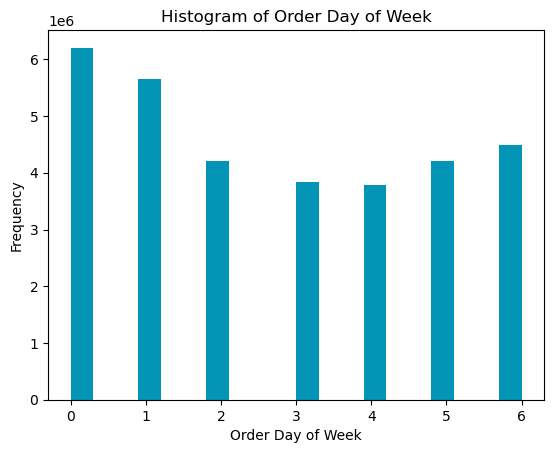

In [94]:
# Viz of the busiest day of week for order
busiest_dow = ords_prods_merge['orders_day_of_week'].plot.hist(bins = 20, color = '#0295b6')

plt.xlabel('Order Day of Week')  # Label for the x-axis
plt.title('Histogram of Order Day of Week') # Chart title

Text(0.5, 1.0, 'Histogram of Order Time of Day')

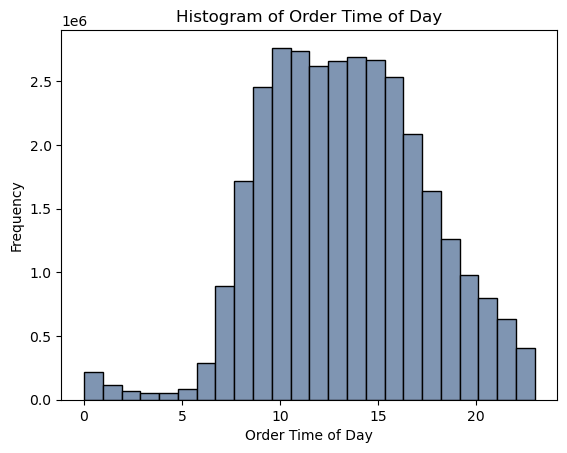

In [95]:
# Viz of the busiest hour of day for order
busiest_hod = ords_prods_merge['order_hour_of_day'].plot.hist(bins = 24, color = '#7f95b2',edgecolor= 'black')

plt.xlabel('Order Time of Day')  # Label for the x-axis
plt.title('Histogram of Order Time of Day')  # Title of the bar chart

#### 8.2 Product price with day and time 

In [96]:
# Create Sample data
np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

# Store 70% of the sample in the data frame big
big = ords_prods_merge[dev]
# Store 30% of the sample in the data frame small
small = ords_prods_merge[~dev] 

C:\Users\hardjan\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\hardjan\AppData\Local\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'Trend of Product Price with Order Time')

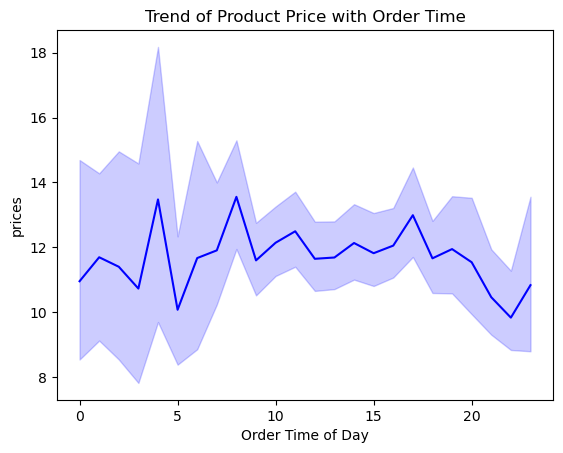

In [97]:
# Create line chart with random small sample data of the dataset to discover the insight of the price of goods and the order time of the day

tod_price = sns.lineplot(data = small, x = 'order_hour_of_day',y = 'prices',color = 'blue')

plt.xlabel('Order Time of Day')  # Label for the x-axis
plt.title('Trend of Product Price with Order Time')  # Title of the bar chart

In [98]:
# Save figure
tod_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'tod_price.png'))

#### 8.3 Most Popular Products 

Text(0, 0.5, ' ')

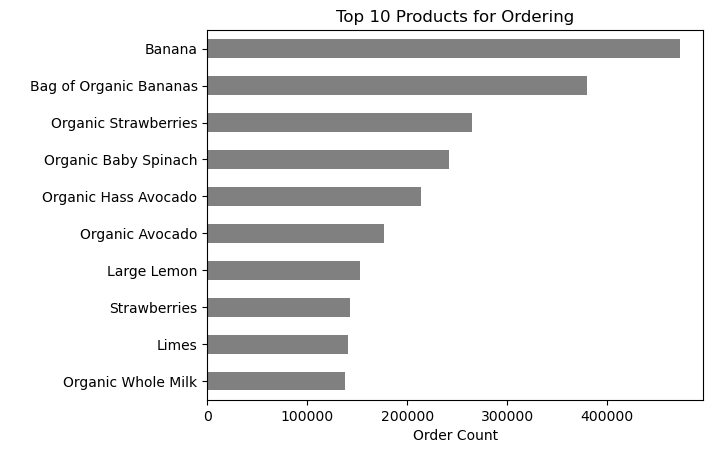

In [99]:
#Finding most popular products
favor_prod=ords_prods_merge['product_name'].value_counts(dropna=False).head(10).sort_values(ascending= True).plot.barh(color=['grey'])

plt.title('Top 10 Products for Ordering') # Chart title
plt.xlabel('Order Count')  # Label for the x-axis
plt.ylabel(' ')  # Label for the y-axis

In [100]:
# Save figure
favor_prod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'favor_product.png'))

In [101]:
# Finding most popular products
favor_dept=ords_prods_merge['department_id'].value_counts(dropna=False).head(10)

Text(0, 0.5, 'Department ID')

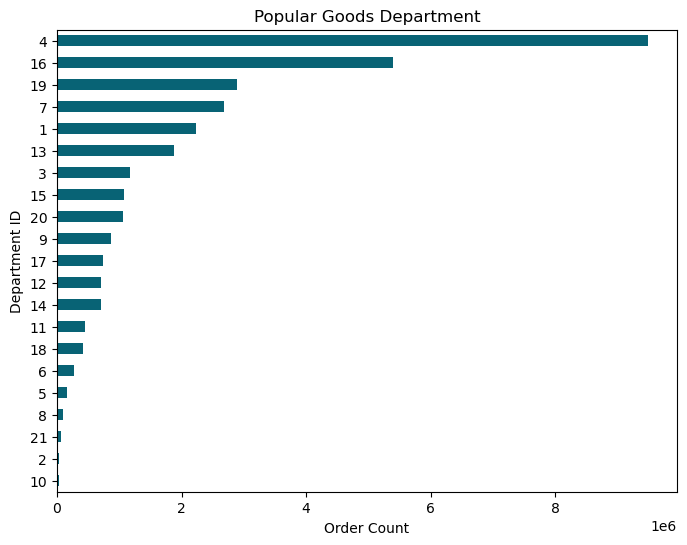

In [102]:
# Setting figure size
plt.figure(figsize=(8, 6))

#Finding most popular department
favor_dept=ords_prods_merge['department_id'].value_counts(dropna=False).sort_values(ascending= True).plot.barh(color=['#086375'])

plt.title('Popular Goods Department') # Chart title
plt.xlabel('Order Count')  # Label for the x-axis
plt.ylabel('Department ID')  # Label for the y-axis

In [103]:
#save the figure
favor_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department.png'))

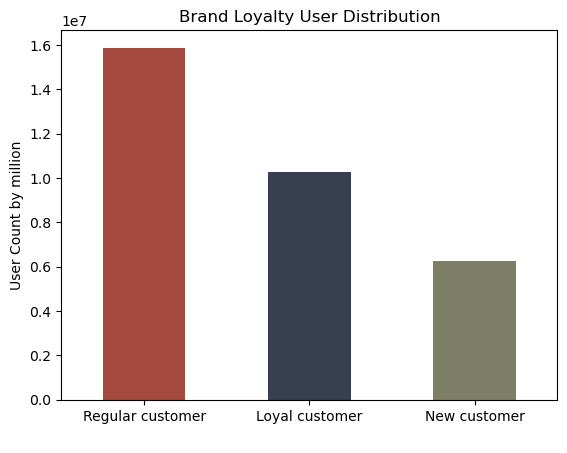

In [104]:
# Create bar chart for brand loyalty user count
ords_prods_merge['loyalty_flag'].value_counts().plot.bar(color =['#a44a3f', '#373f51', '#7c7f65'])

plt.xticks(rotation=0) # x-axis lable angle
plt.title('Brand Loyalty User Distribution') # Chart title
plt.ylabel('User Count by million')  # Label for the y-axis
plt.xlabel(' ') # Label for the x-axis

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_user.png')) # Save figure

TypeError: float() argument must be a string or a real number, not 'Axes'

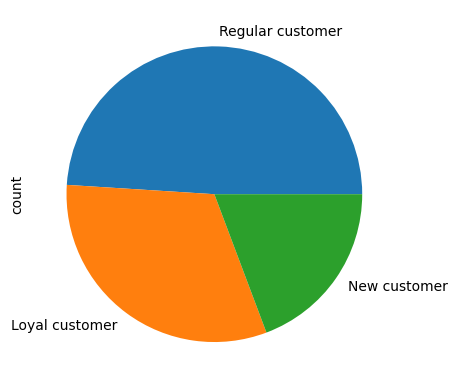

In [157]:
plt.pie(ords_prods_merge['loyalty_flag'] .value_counts().plot.pie(), autopct='%1.1f%%')

##### Order frequency by loyalty status 

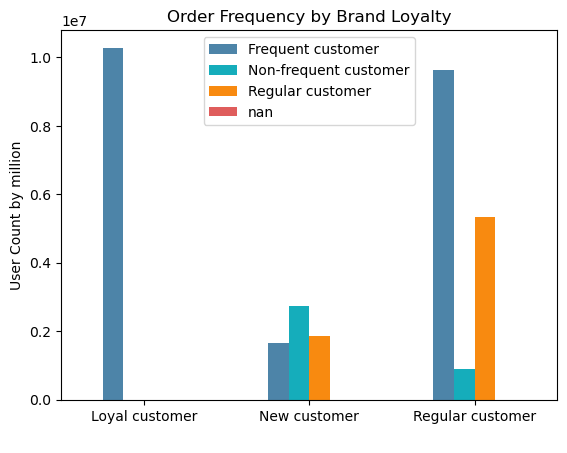

In [105]:
# Group frequency flag by loyalty flag
grouped_counts = ords_prods_merge.groupby(['loyalty_flag', 'order_frequency']).size().unstack()

# Plot the bar plot with color coding
grouped_counts.plot(kind='bar', color=['#4d84a8', '#15adbb', '#f88a10','#df5d5c'])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count by million')
plt.title('Order Frequency by Brand Loyalty')
plt.xticks(rotation=0)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'loyalty_freqt.png')) # Save figure

In [106]:
ords_prods_merge.columns

Index(['Unnamed: 0_x', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'Unnamed: 0.1', 'Unnamed: 0_y', 'order_id',
       'user_id', 'order_sequence_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'add_to_cart_order',
       'reordered', '_merge', 'price_range', 'price_range_loc', 'Busiest day',
       'Busiest days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'mean_product_price', 'spending_flag', 'median_days_between_orders',
       'order_frequency', 'first_name', 'surname', 'Gender', 'State', 'Age',
       'date_joined', 'dependants', 'family_status', 'income', 'region',
       'customer_activity', 'customer_profile'],
      dtype='object')

In [107]:
# Create a subset to analyze customer ordering habbits.
user_ord_hab = ords_prods_merge[['user_id','region','Age','income','product_name','department_id','family_status','loyalty_flag','order_frequency','price_range','spending_flag','customer_activity','customer_profile']]

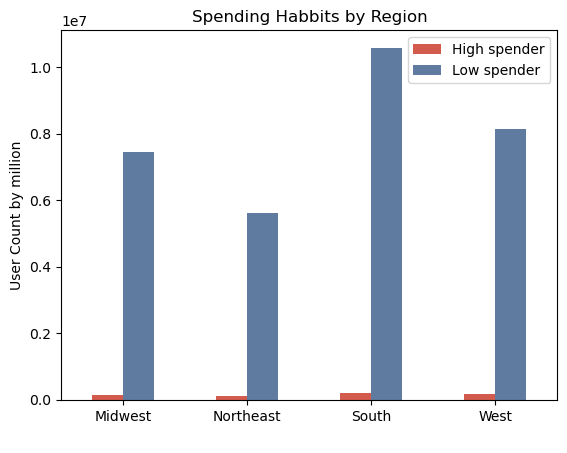

In [108]:
# Group spending flag by region
grouped_counts = user_ord_hab.groupby(['region', 'spending_flag']).size().unstack()

# Plot the bar plot with color coding
grouped_counts.plot(kind='bar', color=['#d35b4d','#5f7b9f'])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count by million')
plt.title('Spending Habbits by Region')
plt.xticks(rotation=0)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_spd.png')) # Save figure

### order frequency by region 


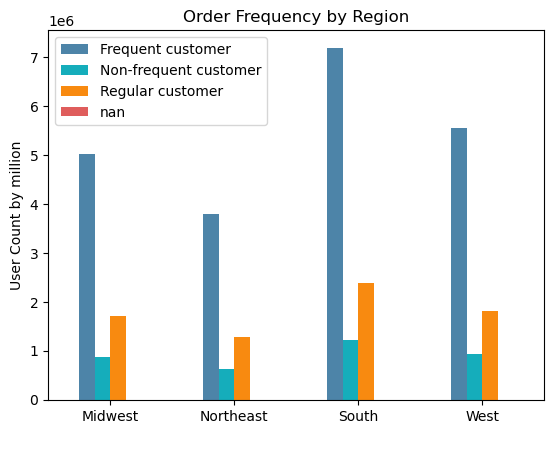

In [110]:
# Group order frequncy by region
grouped_counts = user_ord_hab.groupby(['region', 'order_frequency']).size().unstack()

# Plot the bar plot with color coding
grouped_counts.plot(kind='bar', color=['#4d84a8', '#15adbb', '#f88a10','#df5d5c'])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count by million')
plt.title('Order Frequency by Region')
plt.xticks(rotation=0)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'region_frqt.png')) # Save figure

### 8.5.4. Ordering habbits base on age and family status

In [113]:
# Define age groups
user_ord_hab.loc[(user_ord_hab['Age'] >= 18) & (user_ord_hab['Age'] <= 40) ,'age_profile'] = 'young adult'
user_ord_hab.loc[(user_ord_hab['Age'] > 40) & (user_ord_hab['Age'] <= 60) ,'age_profile'] = 'mid-age'
user_ord_hab.loc[(user_ord_hab['Age'] > 60) & (user_ord_hab['Age'] <= 81) ,'age_profile'] = 'senior'

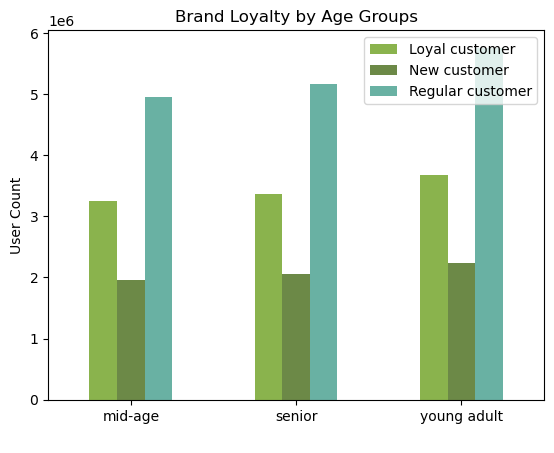

In [116]:
# Brand Loyalty by age groups

grouped_counts = user_ord_hab.groupby(['age_profile', 'loyalty_flag']).size().unstack()

# Plot the bar plot with color coding
grouped_counts.plot(kind='bar', color=['#8ab34d', '#6c8947', '#69b1a3','#1e7a93'])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count')
plt.title('Brand Loyalty by Age Groups')
plt.xticks(rotation=0)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_loyal.png')) # Save figure

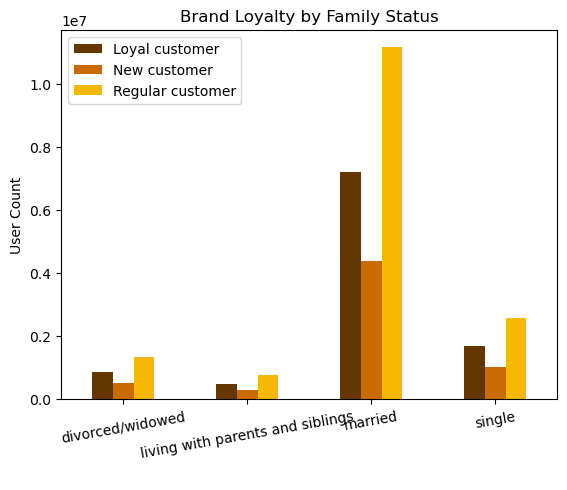

In [117]:
# Brand loyalty by famiy status

grouped_counts = user_ord_hab.groupby(['family_status', 'loyalty_flag']).size().unstack()

# Plot the bar plot with color coding
grouped_counts.plot(kind='bar', color=['#653700', '#ca6b02', '#f7b801'])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count')
plt.title('Brand Loyalty by Family Status')
plt.xticks(rotation=10)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fam_loyal.png')) # Save figure

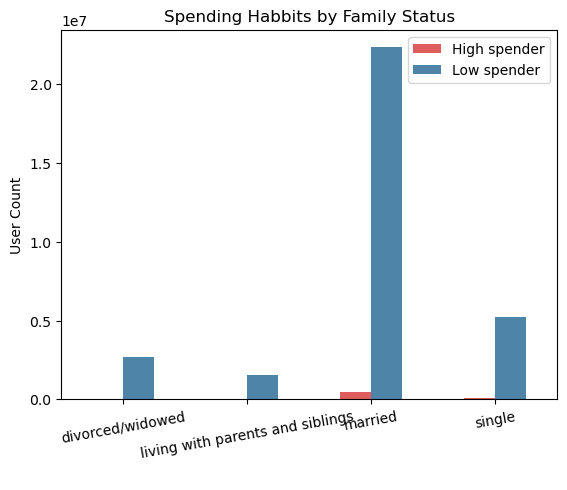

In [119]:
# Spending habbits by famiy status

grouped_counts = user_ord_hab.groupby(['family_status', 'spending_flag']).size().unstack()

# Plot the bar plot with color coding
grouped_counts.plot(kind='bar', color=['#df5d5c','#4d84a8', '#f88a10'])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count')
plt.title('Spending Habbits by Family Status')
plt.xticks(rotation=10)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fam_sped.png')) # Save figure

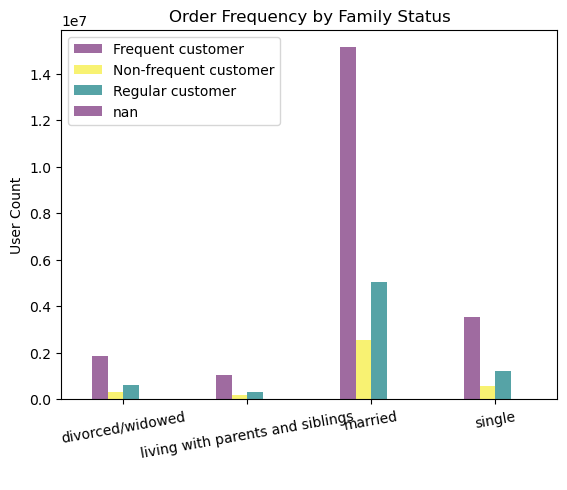

In [121]:
# Order frequency by famiy status

grouped_counts = user_ord_hab.groupby(['family_status', 'order_frequency']).size().unstack()

# Plot the bar plot with color coding
grouped_counts.plot(kind='bar', color=['#9f6ba0', '#f8f272', '#56a3a6'])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count')
plt.title('Order Frequency by Family Status')
plt.xticks(rotation=10)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'fam_freq.png')) # Save figure

In [123]:
# Define income groups
user_ord_hab.loc[(user_ord_hab['income'] < 62636) ,'income_profile'] = 'lower-income'
user_ord_hab.loc[(user_ord_hab['income'] >=62636) & (user_ord_hab['income'] < 95450) ,'income_profile'] = 'lower-middle-class'
user_ord_hab.loc[(user_ord_hab['income'] >= 95450) & (user_ord_hab['income'] < 133392) ,'income_profile'] = 'upper-middle-class'
user_ord_hab.loc[(user_ord_hab['income'] >= 133392) ,'income_profile'] = 'upper-class'

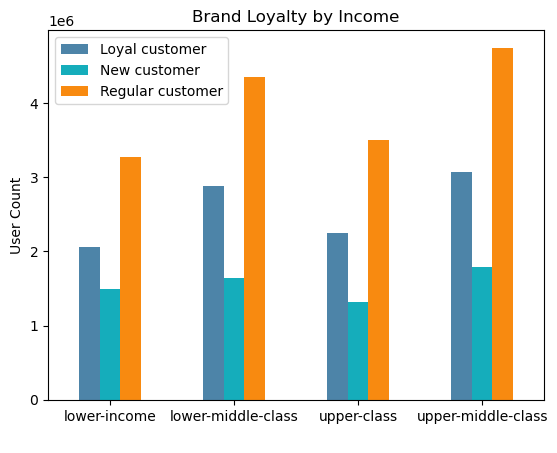

In [124]:
# Brand loyalty by income profile

grouped_counts = user_ord_hab.groupby(['income_profile', 'loyalty_flag']).size().unstack()

# Plot the bar plot with color coding
grouped_counts.plot(kind='bar', color=['#4d84a8', '#15adbb', '#f88a10'])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count')
plt.title('Brand Loyalty by Income')
plt.xticks(rotation=0)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'in_loyal.png')) # Save figure

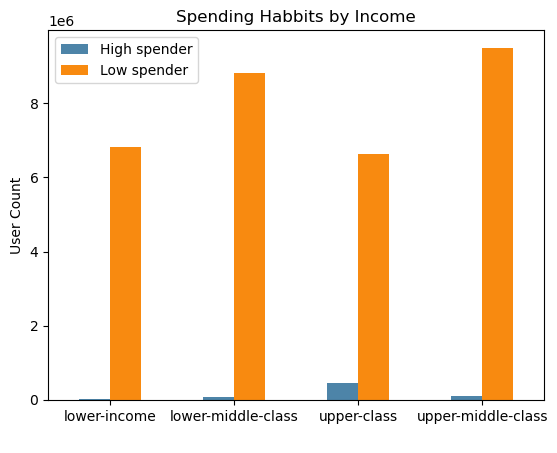

In [125]:
# Spending habbits by income profile

grouped_counts = user_ord_hab.groupby(['income_profile', 'spending_flag']).size().unstack()

# Plot the bar plot with color coding
grouped_counts.plot(kind='bar', color=['#4d84a8',  '#f88a10'])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count')
plt.title('Spending Habbits by Income')
plt.xticks(rotation=0)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'in_sped.png')) # Save figure

In [ ]:
# Order frequency by income profile

grouped_counts = user_ord_hab.groupby(['income_profile', 'frequency_flag']).size().unstack()

# Plot the bar plot with color coding
grouped_counts.plot(kind='bar', color=['#4d84a8', '#15adbb', '#f88a10'])

# Add labels and title
plt.legend(title=None)
plt.xlabel(' ')
plt.ylabel('User Count')
plt.title('Order Frequency by Income')
plt.xticks(rotation=0)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'in_freq.png')) # Save figure

In [128]:
# Define target segment 
Target_segment = user_ord_hab.loc[
    (user_ord_hab['age_profile'] == 'young adult') & 
    ((user_ord_hab['income_profile'] == 'upper-middle-class') | (user_ord_hab['income_profile'] == 'lower-middle-class')) & 
    (user_ord_hab['family_status'] == 'married')]

#### According to data above, the target segment is define as married, middle class young adult.

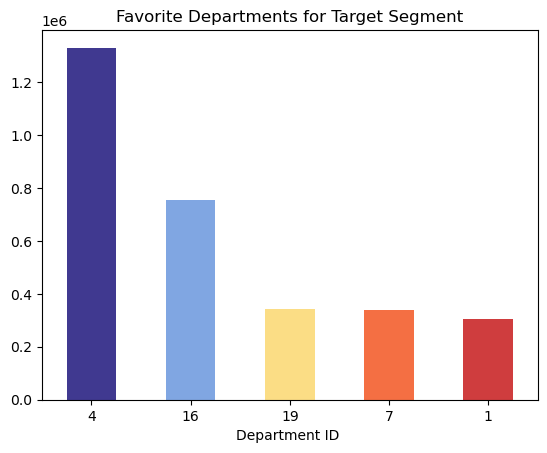

In [129]:
# The popular departments for the target segment
Target_segment['department_id'].value_counts().sort_values(ascending= False ).head(5).plot(kind='bar', color=['#403990', '#80a6e2', '#fbdd85','#f46f43','#cf3d3e'])
plt.xticks(rotation=0)


# Add labels and title
plt.xlabel('Department ID ')
plt.title('Favorite Departments for Target Segment')
plt.xticks(rotation=0)

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'faovr_dept_target.png')) # Save figure

#### ordering habits based on customer profile 

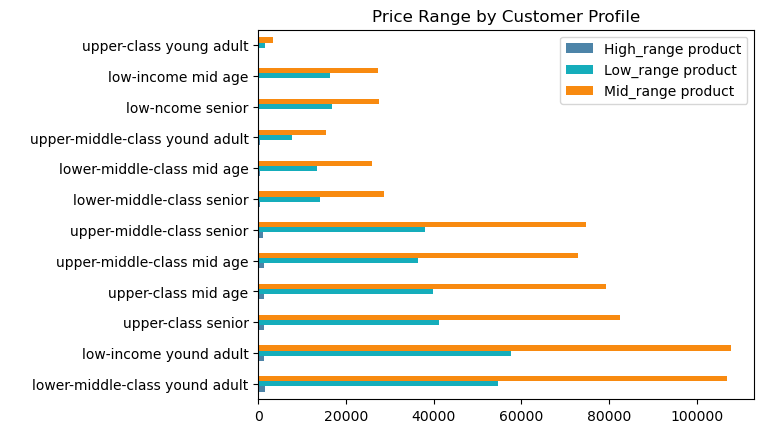

In [131]:
# Group price range order by customer profile
grouped_counts = user_ord_hab.groupby(['customer_profile', 'price_range']).size().unstack().sort_values(by= 'High_range product', ascending = False)

# Plot in to chart
grouped_counts.plot(kind='barh', color = ['#4d84a8','#15adbb','#f88a10'])

# Add labels and title
plt.ylabel(' ')
plt.title('Price Range by Customer Profile')
plt.legend(title =None)


plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_cus_pro.png')) # Save figure

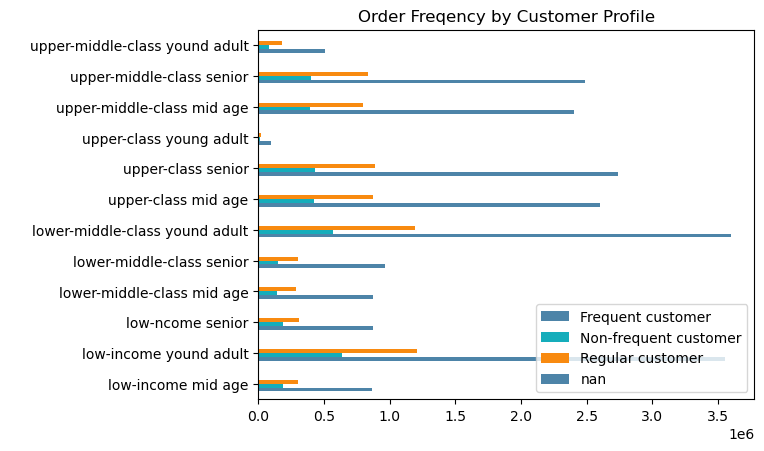

In [132]:
# Group price range order by customer profile
grouped_counts = user_ord_hab.groupby(['customer_profile', 'order_frequency']).size().unstack() 

# Plot in to chart
grouped_counts.plot(kind='barh', color = ['#4d84a8','#15adbb','#f88a10'])

# Add labels and title
plt.ylabel(' ')
plt.title('Order Freqency by Customer Profile')
plt.legend(title =None)


plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'freqt_cus_pro.png')) # Save figure

### The product order based on customer profile 

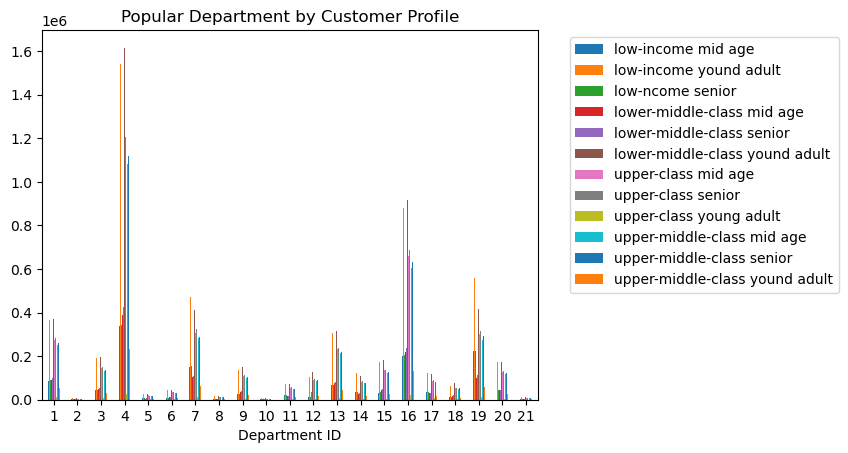

In [133]:
# Group customer profile by department id
grouped_counts = user_ord_hab.groupby(['department_id', 'customer_profile']).size().unstack() 

# Plot in to chart
grouped_counts.plot(kind='bar')

# Add label and title
plt.legend(title=None, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xlabel('Department ID')
plt.title('Popular Department by Customer Profile')

plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'prod_cust.png')) # Save figure

In [134]:
# Price range order count
ords_prods_merge['price_range'].value_counts(dropna= False)

price_range
NaN                   31404859
Mid_range product       652638
Low_range product       338018
High_range product        9344
Name: count, dtype: int64

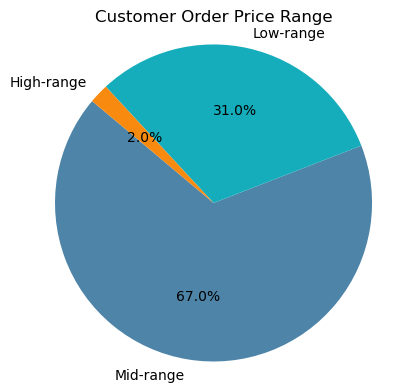

In [135]:
# Data to plot 
labels = ['Mid-range', 'Low-range', 'High-range']
sizes = [67, 31, 2]  # These values represent the percentages of each category
colors = ['#4d84a8', '#15adbb', '#f88a10']


# Plot 
plt.figure(figsize=(4.5, 4.5))  # Set the size of the plot
plt.pie(sizes,  labels=labels, colors=colors, autopct='%1.1f%%',startangle=140  )
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Customer Order Price Range')  # Title of the bar chart

# Save figure
plt.savefig(os.path.join(path, '04 Analysis','Visualizations', 'price_range_product_order_count.png'))

In [159]:
#Export data file 
ords_prods_merge.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_merged_4.10 final.pkl'))